<a href="https://colab.research.google.com/github/DeepthiManthapuram/MachineLearning-Algorithms/blob/main/k_meansClustering_wholesale_customers_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Business Scenario
A wholesale distributor supplies products to different types of clients such as:
Retail stores
Cafés
Hotels
Restaurants
Currently, all customers are treated the same, which leads to:
Inefficient inventory planning
Poor marketing strategies
Missed upselling opportunities
The company wants to group customers based on their purchasing behavior to improve decision-making.

-------------------------------------------
🔹 Task 1: Data Exploration
Load the dataset and inspect all available features.
Identify which columns represent customer purchasing behavior.
Remove or ignore columns that are not directly related to spending patterns.
🔹 Task 2: Feature Selection
Select suitable numerical features that can represent customer buying habits.
Justify your feature selection briefly.
🔹 Task 3: Data Preparation
Prepare the selected data so that distance-based grouping works correctly.
Verify that all features contribute fairly to distance calculation.
🔹 Task 4: Clustering Model Construction
Build a clustering model to group customers into K segments.
Experiment with multiple values of K.
🔹 Task 5: Optimal Cluster Identification
Identify a suitable number of customer groups using an appropriate approach.
Explain why this value of K is reasonable.
🔹 Task 6: Cluster Assignment
Assign each customer to a cluster.
Add the cluster label to the dataset.
🔹 Task 7: Cluster Visualization
Visualize customer clusters using two important spending categories.
Mark cluster centers clearly in the visualization.
🔹 Task 8: Cluster Profiling
For each cluster:
Calculate average spending per category
Identify dominant purchase patterns
Summarize each cluster in business-friendly language.
🔹 Task 9: Business Insight Generation
Propose one business strategy for each customer segment, such as:
Targeted promotions
Inventory prioritization
Personalized pricing strategies
🔹 Task 10: Stability & Limitations
Rerun clustering with a different random state.
Observe whether cluster assignments change.
Mention one limitation of this clustering approach.
## **bold text**

In [1]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [6]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Wholesale customers data.csv")
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [7]:
df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [8]:
df.isna().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


<Axes: >

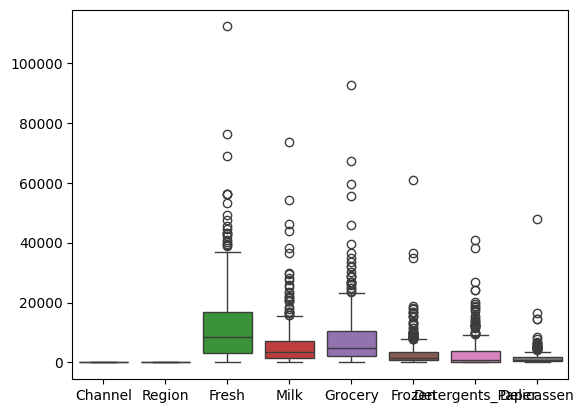

In [9]:
import seaborn as sns

sns.boxplot(df)

In [15]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [16]:
df_numeric_filled = df_numeric.copy()

for column in df_numeric.columns:
    Q1 = df_numeric[column].quantile(0.25)
    Q3 = df_numeric[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    median = df_numeric[column].median()

    # Replace outliers with median
    df_numeric_filled.loc[
        (df_numeric_filled[column] < lower_bound) |
        (df_numeric_filled[column] > upper_bound),
        column
    ] = median

print(f"Original shape: {df_numeric.shape}")
print(f"Filled shape: {df_numeric_filled.shape}")
print("Outliers replaced with median successfully.")


Original shape: (440, 8)
Filled shape: (440, 8)
Outliers replaced with median successfully.


/tmp/ipython-input-620166978.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4755.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_numeric_filled.loc[
/tmp/ipython-input-620166978.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '816.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_numeric_filled.loc[
/tmp/ipython-input-620166978.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '965.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_numeric_filled.loc[


<Axes: >

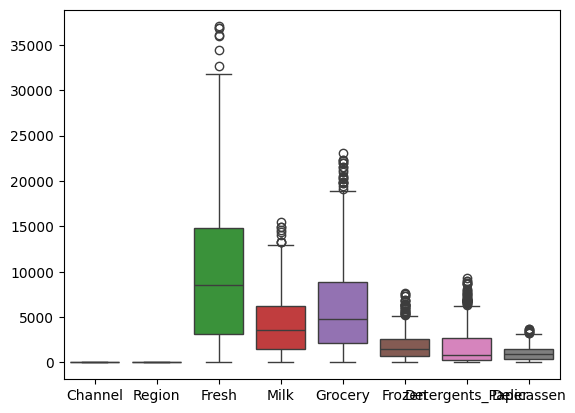

In [18]:
sns.boxplot(df_numeric_filled)

In [19]:
spending_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
customer_spending_df = df[spending_features]
print("Selected features for customer buying habits:")
display(customer_spending_df.head())

Selected features for customer buying habits:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [20]:
spending_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
customer_spending_cleaned = df_numeric_filled[spending_features]
print("Extracted cleaned spending features:")
display(customer_spending_cleaned.head())

Extracted cleaned spending features:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561.0,214,2674.0,1338.0
1,7057,9810,9568.0,1762,3293.0,1776.0
2,6353,8808,7684.0,2405,3516.0,965.5
3,13265,1196,4221.0,6404,507.0,1788.0
4,22615,5410,7198.0,3915,1777.0,965.5


In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
customer_spending_scaled = scaler.fit_transform(customer_spending_cleaned)
customer_spending_scaled_df = pd.DataFrame(customer_spending_scaled, columns=spending_features)

print("Scaled customer spending features (first 5 rows):")
display(customer_spending_scaled_df.head())

Scaled customer spending features (first 5 rows):


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.312278,1.581331,0.251637,-1.005765,0.384841,0.302219
1,-0.352577,1.626645,0.627928,-0.080488,0.659291,0.823978
2,-0.435980,1.331810,0.274698,0.303849,0.758164,-0.141514
3,0.382886,-0.907994,-0.374579,2.694150,-0.575956,0.838273
4,1.490583,0.331960,0.183578,1.206413,-0.012868,-0.141514


In [25]:
x = df.iloc[:,  2: ].values


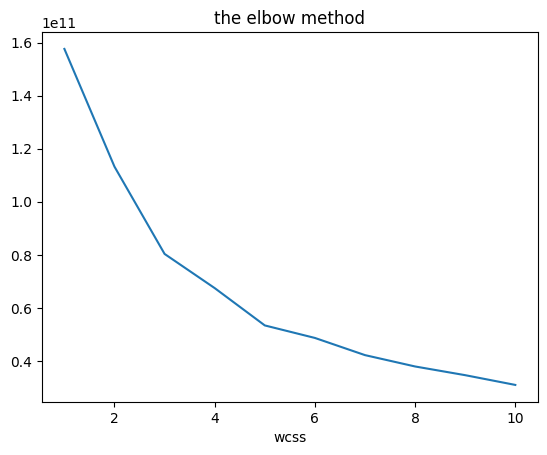

In [26]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters = i,init = 'k-means++',random_state = 0)
  kmeans.fit(x)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title("the elbow method")
plt.xlabel("no of clusters")
plt.xlabel("wcss")
plt.show()

Based on the elbow method plot, the optimal value for 'K' (the number of clusters) appears to be 3. There's a significant drop in the WCSS (Within-Cluster Sum of Squares) up to K=3, after which the decrease in WCSS begins to slow down, forming an 'elbow' shape. This indicates that adding more clusters beyond 3 does not substantially improve the clustering fit.

In [27]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_means = kmeans.fit_predict(x)

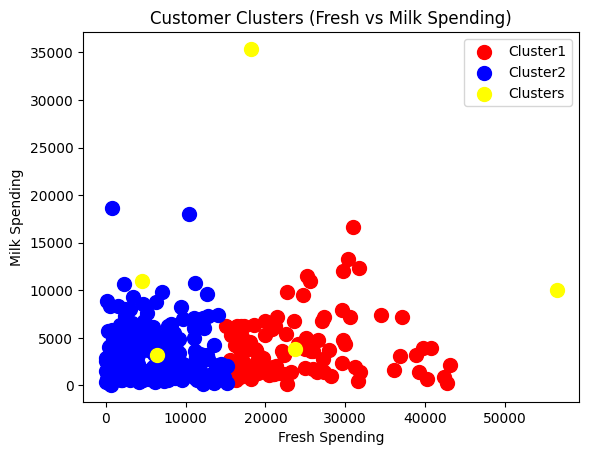

In [31]:
plt.scatter(x[y_means ==0, 0], x[y_means == 0, 1], s = 100, c= 'red', label = 'Cluster1')
plt.scatter(x[y_means ==1, 0], x[y_means == 1, 1], s = 100, c= 'blue', label = 'Cluster2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c= 'yellow', label = 'Clusters')
plt.title("Customer Clusters (Fresh vs Milk Spending)")
plt.xlabel("Fresh Spending")
plt.ylabel("Milk Spending")
plt.legend()
plt.show()